# 湾区单车共享分析

说明：[点此查看此文档的英文版本](https://github.com/udacity/data-analyst/tree/master/projects/bike_sharing)
。

## 简介

> **提示**：诸如此类的引用部分可以为如何导航和使用 iPython notebook 提供有用说明。

湾区单车共享系统（[Bay Area Bike Share](http://www.bayareabikeshare.com/)）是一家为旧金山、雷德伍德城、帕罗奥多、芒廷维尤和圣荷西的客户提供按需单车租赁的公司。使用者可在每个城市的各种车站解锁单车，然后在同城内的任何一个车站还车。使用者可通过按年订购或购买 3 日或 24 小时通票来付费。使用者的出行次数无限制，三十分钟内的行程不收取额外费用；更长行程将产生超时费。

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的两个重要部分：数据整理和探索性数据分析。但是在你开始查看数据前，先思考几个你需要理解的关于单车共享数据的问题，例如，如果你在 Bay Area Bike Share 工作，你会想要获得什么类型的信息来做出更明智的业务决策？或者你可以思考你是否会成为单车共享服务的使用者。哪些因素可能会影响你使用此服务的方式？

**问题 1**：至少写下两个你认为可以用数据来回答的问题。


**答案**：将此文本替换为你的回答！


> **提示**：如果你双击此单元格，你会看到文本发生变化，所有样式均被清除。这将允许你编辑此文本块。此文本块使用 [Markdown](http://daringfireball.net/projects/markdown/syntax) 编写，这是一种使用标题、链接、斜体和许多其他选项为文本添加样式的方式。你将在之后的纳米学位课程中了解关于 Markdown 的更多信息。按 shift + Enter 或 Shift + Return 预览此单元格。

## 使用可视化交流数据发现

作为一名数据分析师，有效交流发现结果的能力是这项工作的重要部分。毕竟，你的分析能力再高也得通过好的交流能力去传达。

在 2014 年，Bay Area Bike Share 举行了一项[开放数据挑战](http://www.bayareabikeshare.com/datachallenge-2014)，以鼓励数据分析师基于他们的开放数据集创建可视化。你将在这个项目中创建自己的可视化，但是首先，请阅读来自 Tyler Field 的[最佳分析提交得主](http://thfield.github.io/babs/index.html)。通读整个报告并回答以下问题：

**问题 2**：基于你的理解，在Tyler Field 的报告中，哪些可视化可提供最有趣的见解？你是否能根据 Tyler 的分析回答你在之前提出的任何问题？能或不能的原因是什么？


**答案**：将此文本替换为你的回答！


## 数据整理

现在是时候由你自己来探索数据了。Bay Area Bike Share 的[开放数据](http://www.bayareabikeshare.com/open-data)页中第 1 年和第 2 年的数据已提供在项目资料中；你无需下载任何其他信息。此数据由三个部分组成：第 1 年上半年（从 `201402` 开始的文件），第 1 年下半年（从 `201408` 开始的文件），以及第 2 年全年（从 `201508` 开始的文件）。每个部分关联三个主要数据文件：行程数据（展示系统中每个行程的信息）（`*_trip_data.csv`），系统中车站的信息（`*_station_data.csv`），及系统中每个城市的每日天气数据（`*_weather_data.csv`）。

在处理大量数据时，最好先从数据样本开始。这样更容易检查我们的数据整理步骤是否有效，因为我们完成代码所需的时间将更少。如果我们对整个过程的进展较为满意，那就可以着手整理整个数据集啦。

因为大量的数据包含在行程信息中，我们的目标应该为取行程数据的子集来进行测试。首先我们仅看看第 1 个月的单车行程数据，从 2013 年 8 月 29 日到 2013 年 9 月 30 日。下面的代码会取第一年上半年的数据，然后将第一个月的数据值写在输出文件上。此代码利用了数据按日期排序的事实（尽管需要指出的是，前两天是按行程时间而非按年月顺序排序）。

首先，运行下方第一个代码单元格来加载你将在分析中使用的所有数据包和函数。然后，运行第二个代码单元格以读取第一个行程数据文件的子集，然后编写一个新文件，其中仅包含我们初步感兴趣的子集。


> **提示**：你可以像格式化 Markdown 单元格那样点击单元格然后使用键盘快捷键 **Shift + Enter** 或 **Shift + Return**，来运行代码单元格。或者，也可以在选中代码单元格后点击工具栏上的 Play 按钮执行它。单元格运行时，你会在单元格左侧的消息中看到一个星号，即 `In [*]:`。在执行完成时，星号将变为一个数字，例如 `In [1]`。如果有输出，将显示 `Out [1]:`，用适当的数字来匹配“In”的数字。


In [1]:
# 导入所有需要的包盒函数

import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
%matplotlib inline #将图片显示在line而不是弹出窗口

In [2]:
# 文档地址

file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # 设置 CSV 读写对象
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # 从 in-file 向 out-file 写入行，直到遇到特定日期
    while True:
        datarow = next(in_reader)
        # 行程开始日期在第三列，为 m/d/yyyy HH:MM  格式
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

### 精简行程数据

第一步是观察数据集的结构，看看我们是否需要执行任何数据整理。下面的单元格会读取你在之前单元格中创建的抽样数据文件，然后打印出表中的前几行。


In [6]:
sample_data = pd.read_csv('201309_trip_data.csv')

display(sample_data.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


在这个探索环节，我们将精简出影响出行次数的行程数据中的因素。首先将注意力放在几个选定列：行程持续时间、开始时间、起始车站、终止车站及订购类型。开始时间将分为年、月和小时部分。我们将添加一列作为星期几，并将起始车站和终止车站转变为起始和终止城市。

现在我们来解决整理过程的最后部分。运行下面的代码单元格，看看车站信息的结构，然后观察代码将如何创建车站城市映射。注意车站映射设立为一个函数 `create_station_mapping()`。因为可随时间推移可添加更多车站或进行删除，在我们准备好开始探索时，此函数将允许我们在数据的所有三个部分结合车站信息。


In [7]:
# 显示车站数据文档的前几行数据。
station_info = pd.read_csv('201402_station_data.csv')
display(station_info.head())

# 这个函数会稍后被另一个函数调用，以创建映射。
def create_station_mapping(station_data):
    """
    Create a mapping from station IDs to cities, returning the
    result as a dictionary.
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # 设置 csv 读取对象 - 注意，我们使用的是 DictReader，他会将
            # 文档第一行作为表头，即每一行的字典键值
            weather_reader = csv.DictReader(f_in)

            for row in weather_reader:
                station_map[row['station_id']] = row['landmark']
    return station_map

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


现在你可以使用映射到来精简行程数据到上述选定列。这将在下面的 `summarise_data()` 函数中执行。作为此函数的部分，将使用 `datetime` 模块从原始数据文件解析作为 `datetime` 对象 (`strptime`) 的时间戳字符串，该字符串可随后输出为不同的字符串格式 (`strftime`)。解析的对象也有很多属性和方法来快速获取

要完成 `summarise_data()` 函数，你将需要先完成两个任务。首先，你需要执行一个运算将行程持续时间的单位从秒转化为分钟。（一分钟为 60 秒）。第二，你需要为年、月、小时和星期几创建列。你可参阅 [datetime 模块中的 datetime 对象文档](https://docs.python.org/2/library/datetime.html#datetime-objects)。**请找到合适的属性和方法来完成下面的代码**。


In [10]:
def summarise_data(trip_in, station_data, trip_out):
    """
    This function takes trip and station information and outputs a new
    data file with a condensed summary of major trip information. The
    trip_in and station_data arguments will be lists of data files for
    the trip and station information, respectively, while trip_out
    specifies the location to which the summarized data will be written.
    """
    # 生成车站字典 - 城市映射
    station_map = create_station_mapping(station_data)
    
    with open(trip_out, 'w') as f_out:
        # 设置 csv 写入对象       
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # 设置 csv 读取对象
                trip_reader = csv.DictReader(f_in)

                # 从每行数据中收集和处理
                for row in trip_reader:
                    new_point = {}
                    
                    # 转换持续时间单位：从秒到分
                    ### 问题 3a: 在下方加入数学运算   ###
                    ### 将持续时间从秒转换为分       ###
                    new_point['duration'] = float(row['Duration'])/60
                    
                    # 将 datestrings 存储进不同的列 
                    ### 问题 3b: 在下方空格中填入以生成 ###
                    ### 预期的时间值                 ###
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.strftime('%Y-%m-%d')
                    new_point['start_year']  = trip_date.year
                    new_point['start_month'] = trip_date.month
                    new_point['start_hour']  = trip_date.hour
                    new_point['weekday']     = trip_date.weekday
                    
                    # 基于起始城市重新映射起始站点
                    new_point['start_city'] = station_map[row['Start Terminal']]
                    new_point['end_city'] = station_map[row['End Terminal']]
                    # 定阅者的两个不同列名称
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # 导出处理完成的信息
                    trip_writer.writerow(new_point)

**问题 3**：运行下面的代码块以调用你在上文单元格中完成的 `summarise_data()` 函数。它会提取 `trip_in` 和 `station_data` 变量中所列文件包含的数据，然后在 `trip_out` 变量中指定的位置编写新的文件。如果你正确执行了数据整理，下面的代码块会打印出 `dataframe` 的前几行，并显示一条消息确认数据点计数是正确的。



In [11]:
# 运行我们上面写的程序来处理数据
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

# 载入数据文件并打印开头几行
sample_data = pd.read_csv(trip_out)
display(sample_data.head())

# 通过统计匹配不同时间特征的数据点来验证 dataframe 
question_3(sample_data)

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,<built-in method weekday of datetime.datetime ...,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,<built-in method weekday of datetime.datetime ...,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,<built-in method weekday of datetime.datetime ...,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,<built-in method weekday of datetime.datetime ...,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,<built-in method weekday of datetime.datetime ...,San Francisco,San Francisco,Subscriber


Wrong number of unique values found for column: weekday
  7 unique values expected; 4 values found.


> **提示**：如果你保存了 jupyter Notebook，运行数据块的输出也将被保存。但是，你的工作空间的状态会在每次开启新会话时重置。请确保你从之前的会话中运行了所有必要的代码块，以在继续上次中断的工作前重建变量和函数。

## 探索性数据分析

现在你已在一个文件中保存了一些数据，那么我们来看看数据的某些初步趋势。`babs_visualizations.py` 脚本中已编写了一些代码，用来帮助你汇总和可视化数据；它们已导出为函数 `usage_stats()` 和 `usage_plot()`。在此部分，我们将了解这些函数的一些用途，你将在项目的最后部分自行使用这些函数。首先，运行以下单元格来加载数据，然后使用 `usage_stats()` 函数查看该服务运营的第一个月的总行程数，以及关于行程持续时间的一些统计数据。


In [12]:
trip_data = pd.read_csv('201309_trip_summary.csv')

usage_stats(trip_data)

There are 27345 data points in the dataset.
The average duration of trips is 27.60 minutes.
The median trip duration is 10.72 minutes.
25% of trips are shorter than 6.82 minutes.
25% of trips are longer than 17.28 minutes.


array([  6.81666667,  10.71666667,  17.28333333])

你会看到第一个月共有超过 27,000 次行程，且平均行程持续时间大于行程持续时间中值（即 50% 的行程短于它，而 50% 的行程长于它的点）。事实上，平均值大于 75% 的最短持续时间。这个现象非常有意思，我们稍后再看。

首先我们来看看这些行程如何按订购类型区分。要对数据进行直观的了解，一个简单的方式是将它绘制成图。为此我们将使用 `usage_plot()` 函数。这个函数的第二个参数允许我们算出选定变量的行程的总数，在一个图中显示信息。下面的表达式将展示共有多少客户和订购者行程。现在就来试试吧！


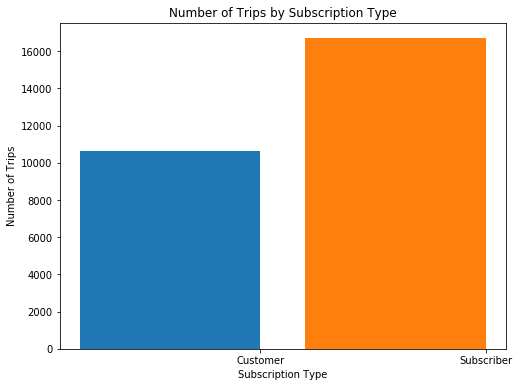

In [13]:
usage_plot(trip_data, 'subscription_type')

看起来在第一个月，订购者的行程比客户的行程多大约 50%。现在我们来尝试一个不同的变量。来看看行程的持续时间状况如何？


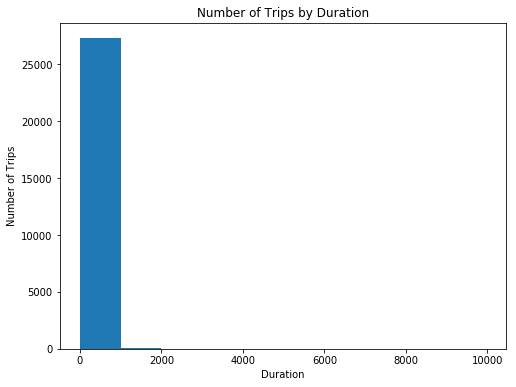

In [14]:
usage_plot(trip_data, 'duration')

看起来挺奇怪的，不是吗？看看 x 轴的持续时间值。大多数骑行时间都是 30 分钟或更少，因为单个行程的额外时间要收取超时费。第一个柱子跨度显示的持续时间达到了约 1000 分钟，或超过 16 个小时。根据我们从 `usage_stats()` 获得的统计数据，某些行程的持续时间非常长，导致平均值远远高于中值：这个图的效果非常夸张，对我们用处不大。

在探索数据时，你经常需要使用可视化函数参数来使数据更易于理解。这里就要用到 `usage_plot()` 函数的第三个参数。可为数据点设置过滤器，作为一系列条件。首先我们限制为不足 60 分钟的行程。


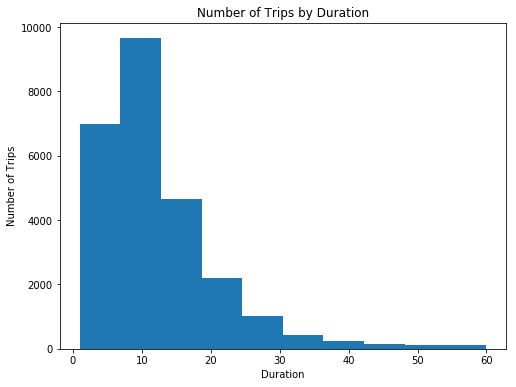

In [15]:
usage_plot(trip_data, 'duration', ['duration < 60'])


这样看起来就好多啦！你可以看到大多数行程实际上持续时间都不足 30 分钟，但你还可以通过其他方法来使展示效果更好。因为最短持续时间非 0，左侧的柱子稍高于 0。我们想要找到 30 分钟的明确边界，这样如果一些柱子尺寸和边界对应某些分钟点时，图上就看起来清晰多了。好消息是你可以使用可选的“boundary”和“bin_width”参数调整图。通过将“boundary”设置为 0，其中一个柱边界（这里为最左侧的柱子）将从 0 开始，而不是最短行程持续时间。以及通过将“bin_width”设为 5，每个柱子将以 5 分钟时间间隔总计时间点。


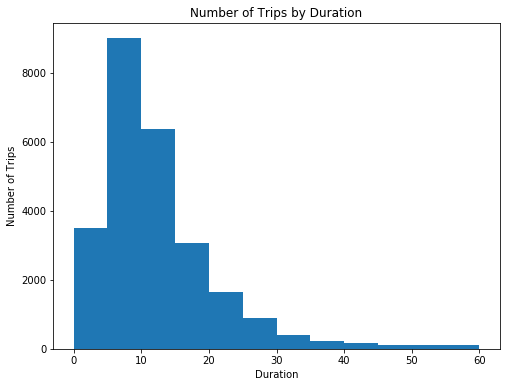

In [16]:
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

**问题 4**：哪个 5 分钟行程持续时间显示了最多的出行次数？这个范围内大约有多少次出行？

**答案**：将此文本替换为你的回答！

像这样的视觉调整虽然较小，但是却对你理解数据和向他人传达你的发现大有帮助。

## 自己执行分析

现在你已使用数据集的小样本完成了一些探索，是时候更进一步，将所有数据整理到一个文件中并看看你能发现什么趋势。下面的代码将使用与之前一样的 `summarise_data()` 函数来处理数据。在运行下面的单元格后，你便将所有的数据处理到了一个数据文件中。注意该函数在运行时不会显示任何输出，而且要花费较长的时间才能完成，因为你现在使用的数据比之前的样本数据多。


In [17]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# 该程序将输入站点和行程信息并将新数据输出至指定文件
summarise_data(trip_in, station_data, trip_out)

由于 `summarise_data()` 函数已创建了一个独立文件，因此无需再次运行上面的单元格，即使你关掉 notebook 并开启一个新会话。你可以直接在数据集中加载，然后从那里进行探索。


In [ ]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

#### 现在轮到你自己使用 `usage_stats()` 和 `usage_plot()` 探索新数据集，并报告你的发现了！下面是如何使用 `usage_plot()` 函数的一些提示：


- 第一个参数（必须）：加载的 dataframe，将从这里分析数据。
- 第二个参数（必须）：区分出行次数的变量。

- 第三个参数（可选）：数据过滤器，限制将计数的数据点。过滤器应作为一系列条件提供，每个元素应该为采用以下格式的一个字符串：`'<field> <op> <value>'`，使用以下任意一个运算符：>、<、>=、<=、==、!=。数据点必须满足所有条件才能计算在内或可视化。例如，`["duration < 15", "start_city == 'San Francisco'"]` 仅保留起始点为旧金山，且持续时间不足 15 分钟的行程。


如果数据在数值变量上进行拆分（从而创建一个直方图），可使用关键字设置一些附加参数。

- "n_bins" 指定成果图中柱子的数量（默认为 10 条）。
- "bin_width" 指定每个柱子的宽（默认为用数据范围除以柱子的数量）。"n_bins" 和 "bin_width" 不可同时使用。
- "boundary" 指定一个柱边界的位置；另一个柱边界将放在那个值的附近（这可能导致绘制多余的柱子）。此参数可以与 "n_bins" 和 "bin_width" 参数一起使用。


你也可以对 `usage_stats()` 函数添加一些自定义。该函数的第二个参数可用于设置过滤器条件，如同用 `usage_plot()` 设置一样。


In [ ]:
usage_stats(trip_data)

In [ ]:
usage_plot(trip_data)

使用上面的函数探索一些不同的变量，并记录你发现的一些趋势。如果你想用其他方式或多个方式探索数据集，可自行创建更多的单元格。


> **提示**: 要向 notebook 添加更多单元格，你可以使用上面的菜单栏中的“在上方插入单元格”和“在下方插入单元格”选项。工具栏中也有添加新单元格的图标，以及用于在文档中上下移动单元格的附加图标。默认情况下，新单元格为代码式；你也可以从单元格菜单或工具栏中的下拉菜单中指定单元格类型（代码式或 Markdown）。

完成探索后，将你认为最有趣的两个可视化复制到下方的单元格中，然后用几句话回答以下问题，说明你的发现及你选择这些数字的原因。确保调整柱子的数量或限制，使它们有效传达数据发现。可自行用从 `usage_stats()` 中生成的任何额外数字进行补充，或放置多个可视化来支持你的观察。


In [ ]:
# Final Plot 1
usage_plot(trip_data)

**问题 5a**：上述可视化有何有趣之处？你为什么选择它

**答案**：将此文本替换为你的回答

In [ ]:
# Final Plot 2
usage_plot(trip_data)

**问题 5b**：上述可视化有何有趣之处？你为什么选择它

**答案**：将此文本替换为你的回答

## 结论

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据到探索数据。通常，在数据分析过程的这个点，你可能想要通过执行统计检验或将数据拟合到一个模型进行预测，来对我们的数据得出结论。还有很多可以对数据执行的潜在分析，但仅靠这里所给的有限代码无法完成。除了结果轴上的出行次数，你还可以观察具有影响的其他特征，如行程持续时间。我们还未研究过天气数据与单车使用之间的联系。

**问题 6**：思考你可以应用数据科学技术的一个话题或兴趣领域。你希望从所选主题中学到什么？

**答案**: 将此文本替换为你的回答！

> **提示**：若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 或 PDF (.pdf)。你可能需要额外软件包或软件来执行这些导出。